In [1]:
!pip3 install face_recognition  

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 3.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.9 MB/s eta 0:00:00
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=ea93478fa45b83286448b1568108538b81e9b686072e90c7f931531027deb201
  Stored in directory: /Users/anshdobariya/Library/Caches/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [30]:
def read_crop_img_with_bbox(full_img_path, bound_box_path):
    img = cv2.imread(full_img_path)
#     print(f"bound_box_path: {bound_box_path}")
#     print(f'bound box: {bbox}')
    real_w = img.shape[1]
    real_h = img.shape[0]
#     print(f'read_w = {img.shape[1]}')
#     print(f'read_h = {img.shape[0]}')
    x1, y1, w1, h1 = get_area_bbox_indices(bound_box_path, real_w, real_h)
#     print(f'x1={x1}, y1={y1}, w1={w1}, and h1={h1}')
    return x1, y1, w1, h1, img, real_w, real_h
def get_area_bbox_indices(bound_box_path, real_w, real_h):
    bound_box_read = open(bound_box_path, "r")
    bound_box_indices = list()
    for i in bound_box_read:
        bound_box_indices.append(i)
    bbox = bound_box_indices[0].split()
    x1, y1, w1, h1 = standard_width_height_scaling(real_w, real_h, 
                                                   bbox[0], bbox[1], bbox[2], bbox[3])
    return x1, y1, w1, h1
def standard_width_height_scaling(real_w, real_h, bbox0, bbox1, bbox2, bbox3):
    x1 = int(int(bbox0)*(float(real_w) / 224)) # bbox[0]
    y1 = int(int(bbox1)*(float(real_h) / 224)) # bbox[1]
    w1 = int(int(bbox2)*(float(real_w) / 224)) # bbox[2]
    h1 = int(int(bbox3)*(float(real_h) / 224)) # bbox[3]
    return x1, y1, w1, h1
bound_box_path="C:\\Users\\yash\\Downloads\\CelebA_Spoof\\Data\\train\\1\\live\\000184_BB.txt"
full_img_path="C:\\Users\\yash\\Downloads\\CelebA_Spoof\\Data\\train\\1\\live\\000184.jpg"

read_crop_img_with_bbox(full_img_path,bound_box_path)

(95,
 44,
 95,
 111,
 array([[[117, 117, 163],
         [115, 115, 161],
         [113, 115, 163],
         ...,
         [170, 166, 165],
         [171, 167, 166],
         [172, 168, 167]],
 
        [[126, 126, 172],
         [125, 125, 171],
         [122, 125, 170],
         ...,
         [171, 167, 166],
         [172, 168, 167],
         [172, 168, 167]],
 
        [[131, 132, 176],
         [130, 131, 175],
         [130, 131, 175],
         ...,
         [171, 167, 166],
         [172, 168, 167],
         [173, 169, 168]],
 
        ...,
 
        [[167, 164, 160],
         [166, 163, 159],
         [166, 163, 159],
         ...,
         [180, 178, 170],
         [180, 177, 172],
         [179, 176, 171]],
 
        [[166, 163, 159],
         [166, 163, 159],
         [166, 163, 159],
         ...,
         [181, 179, 171],
         [179, 176, 171],
         [178, 175, 170]],
 
        [[167, 164, 160],
         [166, 163, 159],
         [166, 163, 159],
         ...,
       

In [ ]:
# import os
# import shutil

# def organize_images(source_dir, destination_dir):
#     for root, dirs, files in os.walk(source_dir):
#         for dir_name in dirs:
#             if dir_name == 'live':
#                 live_dir = os.path.join(root, dir_name)
#                 for file_name in os.listdir(live_dir):
#                     if file_name.endswith('.jpg'):
#                         shutil.copy(os.path.join(live_dir, file_name), os.path.join(destination_dir, 'live'))
#             elif dir_name == 'spoof':
#                 spoof_dir = os.path.join(root, dir_name)
#                 for file_name in os.listdir(spoof_dir):
#                     if file_name.endswith('.jpg'):
#                         shutil.copy(os.path.join(spoof_dir, file_name), os.path.join(destination_dir, 'spoof'))

# source_directory = "C:\\Users\\yash\\Downloads\\CelebA_Spoof\\Data\\train\\"
# destination_directory = "C:\\Users\\yash\\Downloads"  # Specify your destination folder path here

# # Create destination folders if they don't exist
# os.makedirs(os.path.join(destination_directory, 'live'), exist_ok=True)
# os.makedirs(os.path.join(destination_directory, 'spoof'), exist_ok=True)

# organize_images(source_directory, destination_directory)


In [31]:
def get_ratio_bbox_and_image(full_img_path, bound_box_path):
    img = cv2.imread(full_img_path)
    real_h, real_w, _ = img.shape
    area_image = real_h * real_w
    x1, y1, w1, h1 = get_area_bbox_indices(bound_box_path, real_w, real_h)
    area_bbox = w1*h1
    return area_bbox / area_image


def standard_width_height_scaling(real_w, real_h, bbox0, bbox1, bbox2, bbox3):
    x1 = int(int(bbox0)*(float(real_w) / 224)) # bbox[0]
    y1 = int(int(bbox1)*(float(real_h) / 224)) # bbox[1]
    w1 = int(int(bbox2)*(float(real_w) / 224)) # bbox[2]
    h1 = int(int(bbox3)*(float(real_h) / 224)) # bbox[3]
    return x1, y1, w1, h1


def get_area_bbox_indices(bound_box_path, real_w, real_h):
    bound_box_read = open(bound_box_path, "r")
    bound_box_indices = list()
    for i in bound_box_read:
        bound_box_indices.append(i)
    bbox = bound_box_indices[0].split()
    x1, y1, w1, h1 = standard_width_height_scaling(real_w, real_h, 
                                                   bbox[0], bbox[1], bbox[2], bbox[3])
    return x1, y1, w1, h1

def get_padding_bbox_indices(x1, y1, w1, h1, real_w, real_h, ratio_bbox_and_image):
    x1_padding = x1 - int((w1) * (1+ratio_bbox_and_image))
    y1_padding = y1 - int((h1) * (1+ratio_bbox_and_image))
    w1_padding = w1 + int((w1) * (1+ratio_bbox_and_image))
    h1_padding = h1 + int((h1) * (1+ratio_bbox_and_image))
    if x1_padding < 0: 
        x1_padding = 0
    if y1_padding < 0:
        y1_padding = 0
    if w1_padding > real_w:
        w1_padding = real_w
    if h1_padding > real_h:
        h1_padding = real_h
    return x1_padding, y1_padding, w1_padding, h1_padding
    
def read_crop_img_with_bbox(full_img_path, bound_box_path):
    img = cv2.imread(full_img_path)
#     print(f"bound_box_path: {bound_box_path}")
#     print(f'bound box: {bbox}')
    real_w = img.shape[1]
    real_h = img.shape[0]
#     print(f'read_w = {img.shape[1]}')
#     print(f'read_h = {img.shape[0]}')
    x1, y1, w1, h1 = get_area_bbox_indices(bound_box_path, real_w, real_h)
#     print(f'x1={x1}, y1={y1}, w1={w1}, and h1={h1}')
    return x1, y1, w1, h1, img, real_w, real_h

In [34]:
original_cropped_storage = []
padding_cropped_storage = []
img_names = []
original_cropped_labels = []
padding_cropped_labels = []

count_live = 0
count_spoof = 0
dim = (32,32)
count_limit_live = 46137
count_limit_spoof = 200000

rootdir_train = 'C:\\Users\\yash\\Downloads\\CelebA_Spoof\\Data\\train'
for file in os.listdir(rootdir_train):
#     file = '1'
    # file is 1, 1000, ..... 10029,...... => Name of folder 
    d = os.path.join(rootdir_train, file)
    if os.path.isdir(d):
        for e in os.listdir(d):
            # e is "live" or "spoof"
            imgs_path = d + '/' + e + '/'
#             print(imgs)
            for img_path in os.listdir(imgs_path):
#                 print(img_path)
#                 imgs_path = '000184.jpg'
                if (img_path.endswith(".jpg")):
                    full_img_path = imgs_path + img_path
#                     print('full_img_path: {full_img_path}')
                    bound_box_path = full_img_path[0:-4] + '_BB.txt'
#                     print(f'bound_box_path: {bound_box_path}')
                    x1, y1, w1, h1, img, real_w, real_h = read_crop_img_with_bbox(full_img_path, bound_box_path)
                    ratio_bbox_and_image = get_ratio_bbox_and_image(full_img_path, bound_box_path)
#                     print(f'ratio_bbox_and_image = {ratio_bbox_and_image}')
                    x1_padding, y1_padding, w1_padding, h1_padding = get_padding_bbox_indices(x1, y1, w1, h1, 
                                                                                              real_w, real_h,
                                                                                              ratio_bbox_and_image)
#                     print(x1_padding, y1_padding, w1_padding, h1_padding)
#                     plt.imshow(img[y1_padding:y1+h1_padding,
#                                    x1_padding:x1+w1_padding])
                    padding_img = img[y1_padding:y1+h1_padding, x1_padding:x1+w1_padding]
                    try:
                        if (e == 'live' and count_live >= count_limit_live) or (e == 'spoof' and count_spoof >= count_limit_spoof):
                            continue
                        resized_padding_img = cv2.resize(padding_img, dim, interpolation = cv2.INTER_AREA)
                        padding_cropped_storage.append(resized_padding_img)
                        if e == 'live':
                            count_live = count_live + 1
                            padding_cropped_labels.append(1)
                        elif e == 'spoof':
                            count_spoof = count_spoof + 1
                            padding_cropped_labels.append(0)
                    except:
                        continue
                        
#                     original_img = img[y1:y1+h1,x1:x1+w1]
#                     try: 
#                         resized_original_img= cv2.resize(original_img, dim, interpolation = cv2.INTER_AREA)
#                         original_cropped_storage.append(resized_original_img)
#                         if e == 'live':
#                             count_live = count_live + 1
#                             original_cropped_labels.append(1)
#                         elif e == 'spoof':
#                             count_spoof = count_spoof + 1
#                             original_cropped_labels.append(0)
#                     except:
#                         continue
                    img_names.append(img_path)

#                     plt.imshow(img)
#                     plt.imshow(img[y1:y1+h1,x1:x1+w1])
                    print(f'count_live: {count_live}')
                    print(f'count_spoof: {count_spoof}')
                    if (count_live == count_limit_live and e == 'live') or (count_spoof == count_limit_spoof and e == 'spoof'):
                        break
#                 if count_live == count_limit_live and count_spoof == count_limit_spoof:
#                     break
            if count_live >= count_limit_live and count_spoof >= count_limit_spoof:
                break
    if count_live >= count_limit_live and count_spoof >= count_limit_spoof:
        print("DONE Extracting ")
        break

count_live: 1
count_spoof: 0
count_live: 2
count_spoof: 0
count_live: 3
count_spoof: 0
count_live: 4
count_spoof: 0
count_live: 5
count_spoof: 0
count_live: 6
count_spoof: 0
count_live: 7
count_spoof: 0
count_live: 8
count_spoof: 0
count_live: 9
count_spoof: 0
count_live: 10
count_spoof: 0
count_live: 11
count_spoof: 0
count_live: 12
count_spoof: 0
count_live: 13
count_spoof: 0
count_live: 14
count_spoof: 0
count_live: 15
count_spoof: 0
count_live: 16
count_spoof: 0
count_live: 17
count_spoof: 0
count_live: 18
count_spoof: 0
count_live: 19
count_spoof: 0
count_live: 20
count_spoof: 0
count_live: 21
count_spoof: 0
count_live: 22
count_spoof: 0
count_live: 23
count_spoof: 0
count_live: 24
count_spoof: 0
count_live: 25
count_spoof: 0
count_live: 26
count_spoof: 0
count_live: 27
count_spoof: 0
count_live: 28
count_spoof: 0
count_live: 29
count_spoof: 0
count_live: 29
count_spoof: 1
count_live: 29
count_spoof: 2
count_live: 29
count_spoof: 3
count_live: 29
count_spoof: 4
count_live: 29
coun

IndexError: list index out of range

In [36]:
# Save the numpy to NUMPYZ 
X = np.asarray(padding_cropped_storage)
y = np.asarray(padding_cropped_labels)
np.savez('anti_spoofing_data_2_0.npz', X, y)
print("DONE SAVING DATA WITH NPZ")

DONE SAVING DATA WITH NPZ


In [6]:
anti_spoofing_data = np.load('/Users/anshdobariya/Downloads/anti_spoofing_data_3_0.npz')
X, y = anti_spoofing_data['arr_0'], anti_spoofing_data['arr_1']
temp = set(y)
check_live_label = 0
check_spoof_label = 0
for i in y: 
    if i == 1:
        check_live_label += 1
    elif i == 0:
        check_spoof_label += 1
print(f"There are 2 classes including number of live is {check_live_label} and number of spoof is {check_spoof_label}")

There are 2 classes including number of live is 46137 and number of spoof is 50000


In [8]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

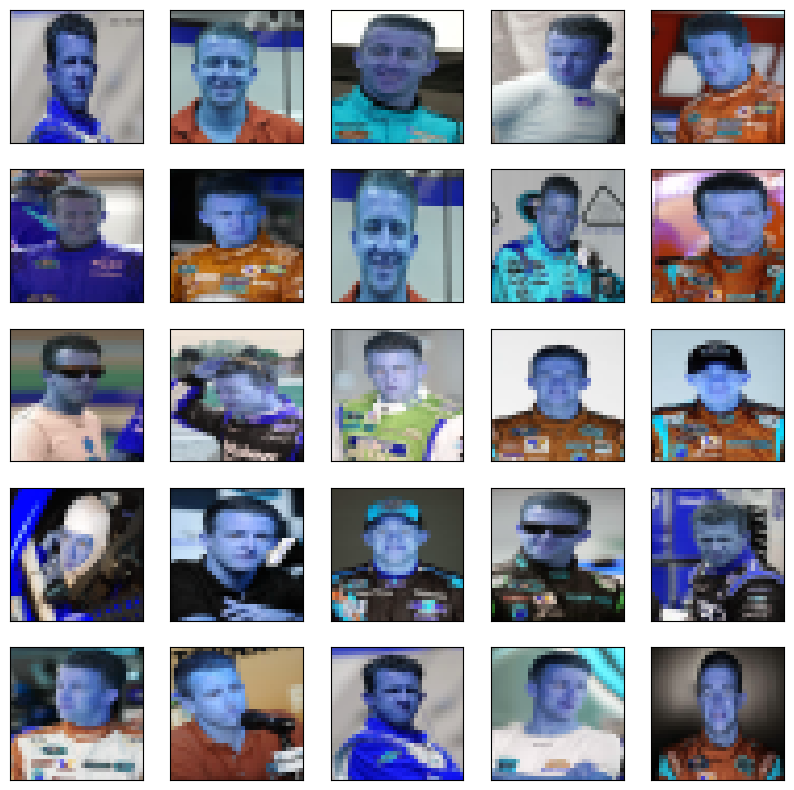

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
#     plt.imshow(original_cropped_storage[i])
    plt.imshow(X[i])
#     plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [25]:
import tensorflow as tf

image_size=(32,32)
train_data_path="C:\\Users\\yash\\Downloads\\train"
data = tf.keras.utils.image_dataset_from_directory(train_data_path,image_size=image_size)
train_data_iter = data.as_numpy_iterator()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Found 468512 files belonging to 2 classes.


In [26]:
train.as_numpy_iterator().next()[0].shape

(32, 32, 32, 3)

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

# X = np.asarray(padding_cropped_storage)
# y = np.asarray(padding_cropped_labels)
print(X.shape)
print(y.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)
print(f'Training dataset size of X_train: {len(X_train)}')
print(f'Testing dataset size of X_test: {len(X_test)}')
print(f'Validation dataset size of X_valid: {len(X_valid)}')
print(f'Testing dataset size of y_train: {len(y_train)}')
print(f'Testing dataset size of y_test: {len(y_test)}')
print(f'Testing dataset size of y_valid: {len(y_valid)}')

(134440, 32, 32, 3)
(134440,)
Training dataset size of X_train: 94108
Testing dataset size of X_test: 20166
Validation dataset size of X_valid: 20166
Testing dataset size of y_train: 94108
Testing dataset size of y_test: 20166
Testing dataset size of y_valid: 20166


In [42]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# X_train, X_test, y_train, y_test
history = model.fit(X_train,y_train, epochs=10, 
                    validation_data=(X_valid,y_valid))
model.save("./my_model_gray_scale_all_data.h5") 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

C:\Users\yash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


631/631 - 2s - loss: 0.1359 - accuracy: 0.9520 - 2s/epoch - 4ms/step


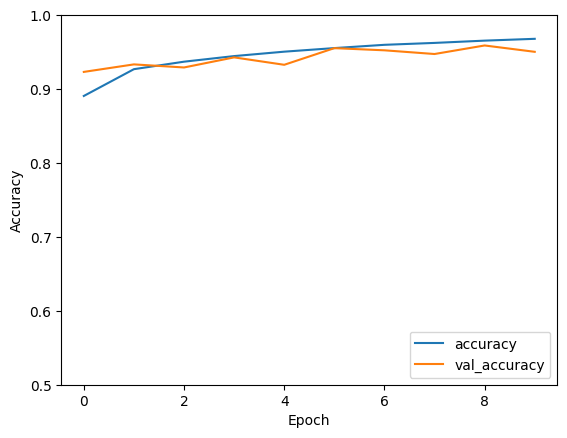

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)